In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings

from io import BytesIO

warnings.filterwarnings('ignore')

# Gather

   * Load `twitter_archive_enhanced.csv` from manually downloaded files
   * Download the tweet image predictions .tsv file programmatically from this url `https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv`
   * Query Tweepy for any intersting data using the tweet IDs we have and store them in `tweet_json.txt`, each tweet data need its own line, then read the `tweet_json.txt` into pandas DF

## Code

* Load `twitter_archive_enhanced.csv`

In [2]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

* Download the tweet image predictions .tsv file programmatically from this url `https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv`

In [3]:
url = """https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"""
with open("image-predictions.tsv", 'wb') as f:
    f.write(requests.get(url).content)
image_predictions = pd.read_csv("image-predictions.tsv", sep="\t")

* Query Tweepy for any intersting data using the tweet IDs we have and store them in `tweet_json.txt`, each tweet data need its own line, then read the `tweet_json.txt` into pandas DF

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
#Reading data from tweet-json.txt
head = ['id', 'retweet_count', 'favorite_count', 'created_at']
tweet_API_data = pd.read_json('tweet.json', lines=True)
for col in list(tweet_API_data.columns):
    if col in head:
        continue
    else:
        tweet_API_data.drop(col, axis=1, inplace=True)

# Assess

In [5]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
tweet_API_data

,created_at,id,retweet_count,favorite_count
0,2017-08-01 16:23:56+00:00,892420643555336193,8853,39467
1,2017-08-01 00:17:27+00:00,892177421306343426,6514,33819
2,2017-07-31 00:18:03+00:00,891815181378084864,4328,25461
3,2017-07-30 15:58:51+00:00,891689557279858688,8964,42908
4,2017-07-29 16:00:24+00:00,891327558926688256,9774,41048
...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,41,111
2350,2015-11-16 00:04:52+00:00,666044226329800704,147,311
2351,2015-11-15 23:21:54+00:00,666033412701032449,47,128
2352,2015-11-15 23:05:30+00:00,666029285002620928,48,132


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive.duplicated().sum()

0

In [10]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Remy         1
Lucky        1
Brutus       1
Charl        1
Jaspers      1
Name: name, Length: 957, dtype: int64

In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_predictions.duplicated().sum()

0

In [14]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [15]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
tweet_API_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2354 non-null   datetime64[ns, UTC]
 1   id              2354 non-null   int64              
 2   retweet_count   2354 non-null   int64              
 3   favorite_count  2354 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 73.7 KB


In [17]:
tweet_API_data.duplicated().sum()

0

In [18]:
tweet_API_data.isnull().sum()

created_at        0
id                0
retweet_count     0
favorite_count    0
dtype: int64

# Clean

## Quality Problems to fix

#### twitter_archive Problems

   * drop retweets
   * drop tweets with no expanded URLs
   * drop retweet related columns
   * Fix `source` column
   * Add URL column
   * Fix Data Types
       * `in_reply_to_status_id` from float to string
       * `in_reply_to_user_id` form flaot to string
       * `timestamp` from string to datetime
   * convert "None" string to NaN values
   * Fix `name` column
    
#### image_predictions Problems

   * Title each prediction & replace the `"_"` with `" "`
   
#### General problems
   * Fix ID data type in order to be able to merge properly

## Tideness Problems to fix

#### `twitter_archive` Problems

   * switch the columns `['doggo', 'floofer', 'pupper', 'puppo']` to `['dog_stage']` only
   
 
* Merge all 3 data frames where they all have the `'tweet_id'` column
   


## Code

### Quality

In [19]:
#Creating copies
tweet_API_data_clean = tweet_API_data.copy()
image_predictions_clean = image_predictions.copy()
twitter_archive_clean = twitter_archive.copy()

In [20]:
#Droping retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [21]:
#Droping tweets with no expanded URLs
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

In [22]:
#Droping ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
to_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean.drop(to_drop, axis=1, inplace=True)

In [23]:
#Fix 'source' column
twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
twitter_archive_clean.source = twitter_archive_clean.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

In [24]:
#Adding 'URL' column using 'tweet_id' column
# FORMAT --> https://twitter.com/dog_rates/status/889531135344209921
base_URL = "https://twitter.com/dog_rates/status/"
twitter_archive_clean['URL'] = base_URL + twitter_archive_clean.tweet_id.astype(str)

##### Fix data types

In [25]:
#'in_reply_to_status_id' from float to int
#'in_reply_to_user_id' form flaot to int
#'timestamp' from string to datetime

twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype(str)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Fix nan STR values

In [26]:
# Convert "None" string values in ['doggo', 'floofer', 'pupper', 'puppo'] to nan
twitter_archive_clean.replace('None', np.NaN, inplace=True)

In [27]:
#Fix 'name' column
names_to_change = ['None', 'a', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'
                  'mad', 'just', 'his', 'by', 'an', 'all', 'actually', 'O']
for name in names_to_change:
    twitter_archive_clean.name.replace(name, np.NaN, inplace=True)

In [28]:
#replacing '_' with ' ' and fixing capitalization in image_predictions
columns = ['p1', 'p2', 'p3']
for column in columns:
    image_predictions_clean[column] = image_predictions_clean[column].str.replace('_', ' ')
    image_predictions_clean[column] = image_predictions_clean[column].str.title()

## Test

### Quality

In [29]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2117 non-null   int64              
 1   in_reply_to_status_id  2117 non-null   object             
 2   in_reply_to_user_id    2117 non-null   object             
 3   timestamp              2117 non-null   datetime64[ns, UTC]
 4   source                 2117 non-null   object             
 5   text                   2117 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2117 non-null   int64              
 8   rating_denominator     2117 non-null   int64              
 9   name                   1402 non-null   object             
 10  doggo                  84 non-null     object             
 11  floofer                10 non-null     object           

In [30]:
twitter_archive_clean.isnull().sum()

tweet_id                    0
in_reply_to_status_id       0
in_reply_to_user_id         0
timestamp                   0
source                      0
text                        0
expanded_urls               0
rating_numerator            0
rating_denominator          0
name                      715
doggo                    2033
floofer                  2107
pupper                   1885
puppo                    2093
URL                         0
dtype: int64

In [31]:
twitter_archive_clean.notnull().sum()

tweet_id                 2117
in_reply_to_status_id    2117
in_reply_to_user_id      2117
timestamp                2117
source                   2117
text                     2117
expanded_urls            2117
rating_numerator         2117
rating_denominator       2117
name                     1402
doggo                      84
floofer                    10
pupper                    232
puppo                      24
URL                      2117
dtype: int64

In [32]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'URL'],
      dtype='object')

In [33]:
twitter_archive_clean[twitter_archive_clean.floofer.notnull()][twitter_archive_clean.doggo.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,URL
200,854010172552949760,nan,nan,2017-04-17 16:34:26+00:00,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,floofer,NaN,NaN,https://twitter.com/dog_rates/status/854010172...


In [34]:
twitter_archive_clean.name.value_counts()

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Penny       9
           ..
Barclay     1
Mitch       1
Brandy      1
Karl        1
Jaspers     1
Name: name, Length: 937, dtype: int64

In [35]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [36]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
tweet_API_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2354 non-null   datetime64[ns, UTC]
 1   id              2354 non-null   int64              
 2   retweet_count   2354 non-null   int64              
 3   favorite_count  2354 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 73.7 KB


## Code

### Tidiness

In [38]:
#preparing for merging tables by setting all ID related columns into strings
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
tweet_API_data_clean.id = tweet_API_data_clean.id.astype(str)

In [39]:
#Melting dog stage columns into 1 column
dog_stage_list = ['doggo', 'floofer', 'pupper', 'puppo']
result = pd.Series()
for first_stage in dog_stage_list:
    for second_stage in dog_stage_list:
        if first_stage == second_stage:
            continue
        first = twitter_archive_clean[first_stage].dropna()
        second = twitter_archive_clean[second_stage].dropna()
        result = result.append((first + " & " + second).dropna())

twitter_archive_clean['multiple_dog_stages'] = np.nan
twitter_archive_clean['multiple_dog_stages'] = twitter_archive_clean['multiple_dog_stages'].append(result, ignore_index=True)
result = pd.Series()
for dog_stage in dog_stage_list:
    result = result.append(twitter_archive_clean[dog_stage][twitter_archive_clean[dog_stage].notnull()])
result = result.append(twitter_archive_clean.multiple_dog_stages[twitter_archive_clean.multiple_dog_stages.notnull()])
twitter_archive_clean['dog_stage'] = np.nan
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].append(result, ignore_index=True, verify_integrity=True)
twitter_archive_clean.drop('multiple_dog_stages', inplace=True, axis=1)
twitter_archive_clean[twitter_archive_clean.dog_stage.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,URL,dog_stage
2117,670421925039075328,nan,nan,2015-11-28 02:00:17+00:00,Twitter for iPhone,Meet Herb. 12/10 https://t.co/tLRyYvCci3,https://twitter.com/dog_rates/status/670421925...,12,10,Herb,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670421925...,doggo
2118,670420569653809152,nan,nan,2015-11-28 01:54:54+00:00,Twitter for iPhone,This is Damon. The newest presidential candida...,https://twitter.com/dog_rates/status/670420569...,10,10,Damon,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670420569...,doggo
2119,670417414769758208,nan,nan,2015-11-28 01:42:22+00:00,Twitter for iPhone,Sharp dog here. Introverted. Loves purple. Not...,https://twitter.com/dog_rates/status/670417414...,6,10,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670417414...,doggo
2120,670411370698022913,nan,nan,2015-11-28 01:18:21+00:00,Twitter for iPhone,Meet Scooter. He's ready for his first day of ...,https://twitter.com/dog_rates/status/670411370...,12,10,Scooter,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670411370...,doggo
2121,670408998013820928,nan,nan,2015-11-28 01:08:55+00:00,Twitter for iPhone,This is Peanut. He was the World Table Tennis ...,https://twitter.com/dog_rates/status/670408998...,10,10,Peanut,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670408998...,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,nan,nan,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,pupper
2352,666044226329800704,nan,nan,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,pupper
2353,666033412701032449,nan,nan,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,pupper
2354,666029285002620928,nan,nan,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,pupper


In [40]:
whos

Variable                  Type              Data/Info
-----------------------------------------------------
BytesIO                   type              <class '_io.BytesIO'>
base_URL                  str               https://twitter.com/dog_rates/status/
col                       str               quoted_status
column                    str               p3
columns                   list              n=3
dog_stage                 str               puppo
dog_stage_list            list              n=4
f                         BufferedWriter    <_io.BufferedWriter name='image-predictions.tsv'>
first                     Series            12      puppo\n14      pu<...>ame: puppo, dtype: object
first_stage               str               puppo
head                      list              n=4
image_predictions         DataFrame                         tweet_id <...>n[2075 rows x 12 columns]
image_predictions_clean   DataFrame                         tweet_id <...>n[2075 rows x 12 columns]
j

In [41]:
#finding most probable prediction from image_predictions dataframe

image_predictions_clean['predicted_breed'] = np.NaN
for i in range(len(image_predictions_clean)):
    if image_predictions_clean['p1_dog'][i] == 1:
        image_predictions_clean['predicted_breed'][i] = image_predictions_clean['p1'][i]
    elif image_predictions_clean['p2_dog'][i] == 1:
        image_predictions_clean['predicted_breed'][i] = image_predictions_clean['p2'][i]
    elif image_predictions_clean['p3_dog'][i] == 1:
        image_predictions_clean['predicted_breed'][i] = image_predictions_clean['p3'][i]

In [42]:
#Rename 'id' column to 'tweet_id' to match the other tables
tweet_API_data_clean['tweet_id'] = tweet_API_data_clean.id
tweet_API_data_clean.drop('id', inplace=True, axis=1)

In [43]:
#Mergin dataframes
#twitter_archive_clean['predicted_breed'] = image_predictions_clean['predicted_breed']
#twitter_archive_clean['retweet_count'] = tweet_API_data_clean.retweet_count.astype('Int64')
#twitter_archive_clean['favorite_count'] = tweet_API_data_clean.favorite_count.astype('Int64')
twitter_archive_clean = pd.merge(twitter_archive_clean,image_predictions_clean[['tweet_id','predicted_breed']], on = 'tweet_id', how='left')
twitter_archive_clean = pd.merge(twitter_archive_clean,tweet_API_data_clean, on = 'tweet_id', how='left')

## Test

### Tidiness

In [44]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,URL,dog_stage,predicted_breed,created_at,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,NaN,NaN,2017-08-01 16:23:56+00:00,8853,39467
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,NaN,Chihuahua,2017-08-01 00:17:27+00:00,6514,33819
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,NaN,Chihuahua,2017-07-31 00:18:03+00:00,4328,25461
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,NaN,Labrador Retriever,2017-07-30 15:58:51+00:00,8964,42908
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,NaN,Basset,2017-07-29 16:00:24+00:00,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,666049248165822465,nan,nan,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,pupper,Miniature Pinscher,2015-11-16 00:24:50+00:00,41,111
2113,666044226329800704,nan,nan,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,pupper,Rhodesian Ridgeback,2015-11-16 00:04:52+00:00,147,311
2114,666033412701032449,nan,nan,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,pupper,German Shepherd,2015-11-15 23:21:54+00:00,47,128
2115,666029285002620928,nan,nan,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,pupper,Redbone,2015-11-15 23:05:30+00:00,48,132


In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2117 non-null   object             
 1   in_reply_to_status_id  2117 non-null   object             
 2   in_reply_to_user_id    2117 non-null   object             
 3   timestamp              2117 non-null   datetime64[ns, UTC]
 4   source                 2117 non-null   object             
 5   text                   2117 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2117 non-null   int64              
 8   rating_denominator     2117 non-null   int64              
 9   name                   1402 non-null   object             
 10  doggo                  84 non-null     object             
 11  floofer                10 non-null     object           

In [46]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   object 
 1   jpg_url          2075 non-null   object 
 2   img_num          2075 non-null   int64  
 3   p1               2075 non-null   object 
 4   p1_conf          2075 non-null   float64
 5   p1_dog           2075 non-null   bool   
 6   p2               2075 non-null   object 
 7   p2_conf          2075 non-null   float64
 8   p2_dog           2075 non-null   bool   
 9   p3               2075 non-null   object 
 10  p3_conf          2075 non-null   float64
 11  p3_dog           2075 non-null   bool   
 12  predicted_breed  1751 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 168.3+ KB


In [47]:
tweet_API_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2354 non-null   datetime64[ns, UTC]
 1   retweet_count   2354 non-null   int64              
 2   favorite_count  2354 non-null   int64              
 3   tweet_id        2354 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 73.7+ KB


# Saving cleaned Master Data

In [48]:
twitter_archive_clean.to_csv("twitter_archive_master.csv.csv", index=False)

# Visualizing Data

In [49]:
myData = pd.read_csv("twitter_archive_master.csv.csv")
myData.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'URL', 'dog_stage', 'predicted_breed', 'created_at', 'retweet_count',
       'favorite_count'],
      dtype='object')

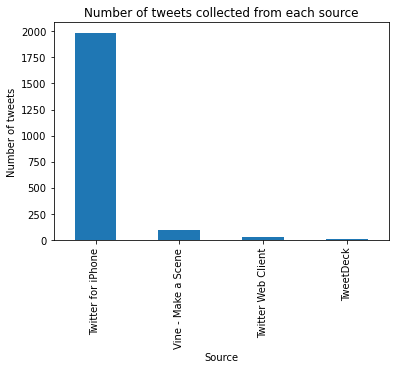

In [50]:
myData.source.value_counts().plot(kind='bar', xlabel='Source', ylabel='Number of tweets', title="Number of tweets collected from each source");

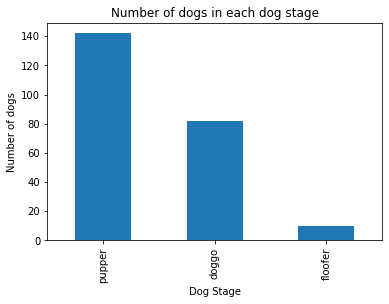

In [51]:
myData.dog_stage.value_counts().plot(kind='bar', xlabel = 'Dog Stage', ylabel='Number of dogs', title="Number of dogs in each dog stage");

In [52]:

myData[myData.predicted_breed == 'Golden Retriever'].dog_stage.value_counts()


pupper    9
doggo     6
Name: dog_stage, dtype: int64

In [53]:
myData.predicted_breed.value_counts()

Golden Retriever        158
Labrador Retriever      108
Pembroke                 95
Chihuahua                91
Pug                      62
                       ... 
Irish Wolfhound           1
Scotch Terrier            1
Bouvier Des Flandres      1
Japanese Spaniel          1
Standard Schnauzer        1
Name: predicted_breed, Length: 113, dtype: int64

In [54]:
myData.retweet_count.mean()

2826.723665564478

In [55]:
myData.favorite_count.mean()

8936.635805384978